In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adult_df=pd.read_csv(r'adult_data.csv',
                     header=None,delimiter=' *, *')
adult_df.head()

C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_11456/4028798880.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  adult_df=pd.read_csv(r'adult_data.csv',


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult_df.columns=['age','workclass','fnlwgt','education','education_num',
                  'marital status','occupation','relationship',
                  'race','sex','capital_gain','capital_loss',
                  'hours_per_week','native_country','income']

In [4]:
adult_df.shape

(32561, 15)

In [5]:
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


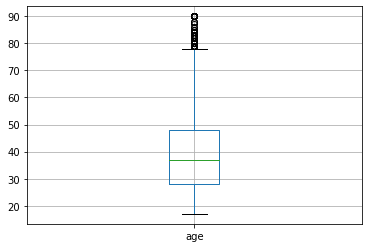

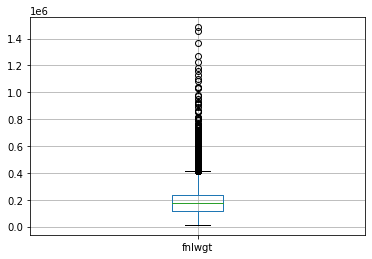

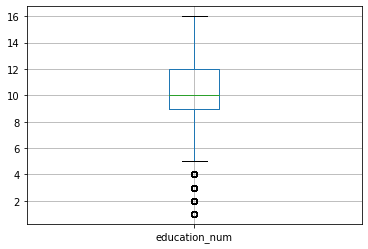

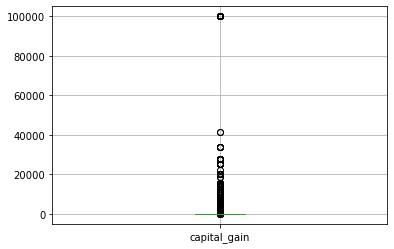

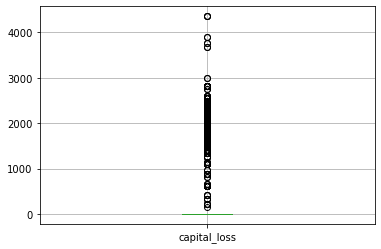

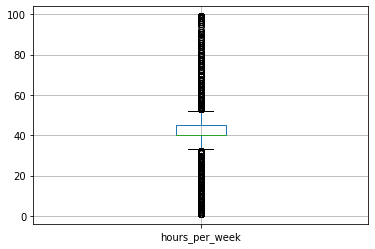

In [6]:

colname=[]

for x in adult_df.columns[:-1]:
    if adult_df[x].dtype =="int64"or adult_df[x].dtype =="float64":
        colname.append(x)
for x in colname:
    adult_df.boxplot(column=x)
    plt.show()

- Logically relevant values should not be consider as outliers.


- When cluster of point are detected as outliers do not impute them. 


- Do not detect outliers for discrete value numerical variable.






In [7]:
adult_df.drop(adult_df[adult_df['capital_gain']>80000].index,axis=0,inplace=True)

In [8]:
adult_df.shape

(32402, 15)

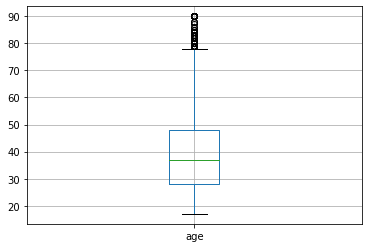

In [9]:
adult_df.boxplot(column='age')
plt.show()

- Ideally on age variable we cannot detect outlier,we know that the values are accpetable logically, just for the sake of implementation am trying this.
 

In [10]:
#for value in colname:

q1=adult_df['age'].quantile(0.25) #first quartile value

q3=adult_df['age'].quantile(0.75)# seconf quartile value

iqr= q3-q1 #interquartile range

low=q1-1.5*iqr #acceptable range

high=q3+1.5*iqr #accpetable range


#measure of central tendancy approch

In [11]:
adult_df_include=adult_df[(adult_df['age'] >= low) & (adult_df['age'] <=high)]#meeting the acceptable range

adult_df_exclude=adult_df[(adult_df['age'] < low) | (adult_df['age'] > high)]#not meeting acceptable range

In [12]:
adult_df_exclude.shape

(143, 15)

In [13]:
adult_df_include.shape

(32259, 15)

In [14]:
print(low)

-2.0


In [15]:
print(high)

78.0


In [16]:
age_mean=int(adult_df_include.age.mean()) #finding the mean of the acceptable range 

In [17]:
age_mean

38

In [18]:
#imputing outlier values with mean value

adult_df_exclude.age=age_mean

C:\Users\akshay0909\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
#getting back the original shape of df

adult_df_rev=pd.concat([adult_df_include,adult_df_exclude],axis=0)

adult_df_rev.shape

(32402, 15)

- Do not detect outliers once you have treated them,because the range as change now and accordingly the boxplot will be reflecting some other values as outlier.

In [ ]:
#capping approach
adult_df_exclude.loc[adult_df_exclude['age']< low ,'age']=low

adult_df_exclude.loc[adult_df_exclude['age']> high ,'age']=high